# Assignment 3: Steller Classification

### Prerequisites

In [1]:
#Loading Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence

## Exploratory Data Analysis (EDA)

In [2]:
#Load Steller data
df=pd.read_csv('C:/Users/Mariam/Desktop/Maryam_Python/dsi_2022-02/star_classification.csv')


In [3]:
#View the data
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
#Describe the data
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


##### Descriptive statistics

In [6]:
#Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [7]:
# No. of rows & colomns
df.shape

(100000, 18)

In [8]:
#Find the duplicates

df.duplicated().sum()

0

#### ‘0’ means, there is not a single duplicate value present in our dataset

In [9]:
#Find null values
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

#### No missing values detected in the dataset

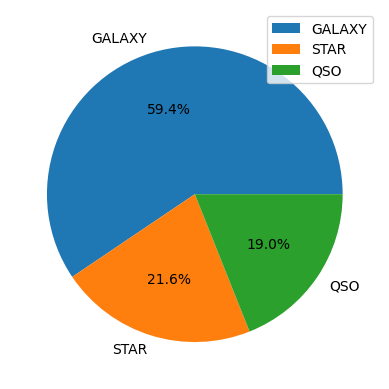

In [10]:
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

In [11]:
#Datatypes
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [12]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

### Categorical Feature Analysis

In [13]:
#Categorical Feature Analysis
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

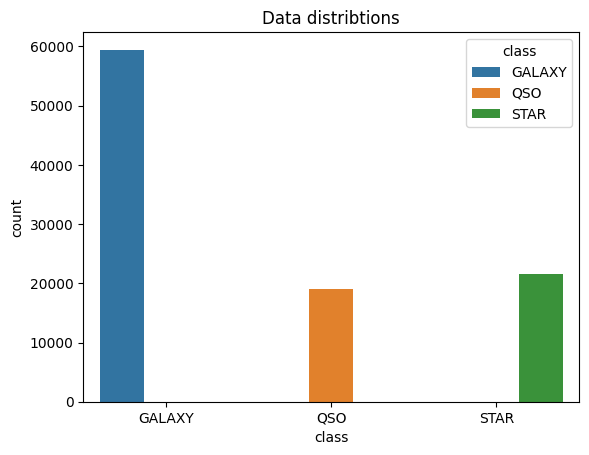

In [14]:
#Data distribtions for each class 
categorical_list = ["class"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title('Data distribtions')

#### We can observe from the class distribution above that the data is imbalanced.

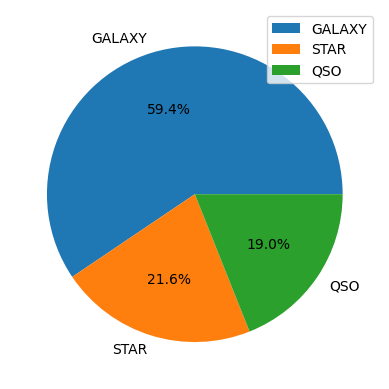

In [15]:
#prpotion of the different classes
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

#### From the chart above we can see that majority class are Galaxies with 59%, then Stars with arround 22% and only 19% of data are classified as QSOs.

### Numerical Feature Analysis

In [16]:
# Numerical Feature Analysis - 
numeric_list = ["obj_ID", "alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


#### Univariate Analysis - Redshift feature

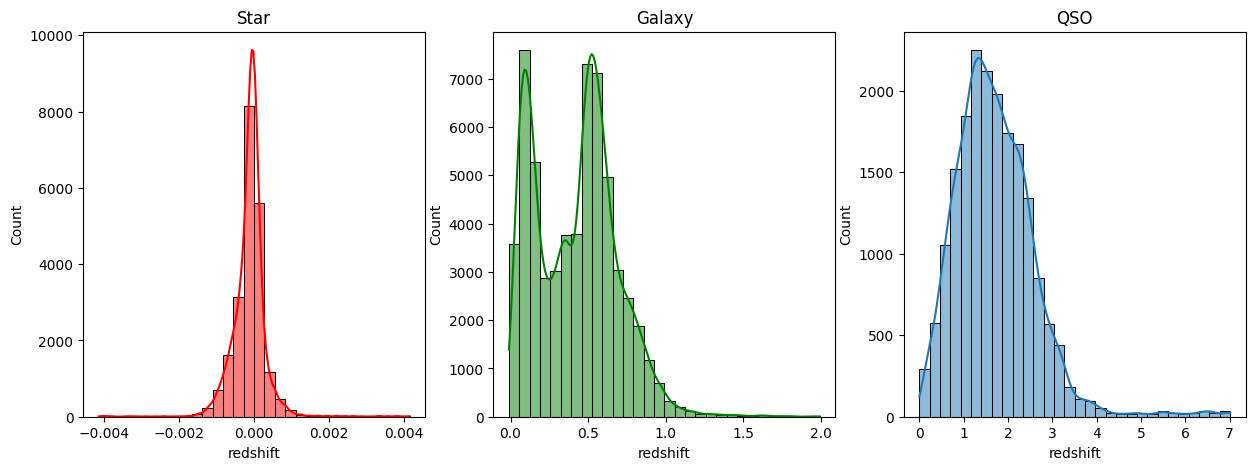

In [17]:
#Redshift Demonstration - As the source moves away, the light loses energy and its frequency is decreased and it appears red. 

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax = sns.histplot(df[df['class']=='STAR'].redshift,color='red', bins = 30, ax = axes[0], kde =True)
ax.set_title('Star')
ax = sns.histplot(df[df['class']=='GALAXY'].redshift,color='green' ,bins = 30, ax = axes[1], kde =True)
ax.set_title('Galaxy')
ax = sns.histplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde =True)
ax = ax.set_title('QSO')

##### We can observe that there are differentiation in redshift values for each class
* For Star we can see that the distribution looks like a normal distribution
* For Galaxy we can see that the distribution bimodal distribution
* For QSO we can see that the distribution right skewed distribution
##### The histplot indicates that the majority of the observed stars are not as far away from Earth as galaxies or quasars. Therfor, from using only the'redshift' column, we can easily differentiate between the different classes.

#### Multivariate Analysis - Filter band u,g,r,i,z features

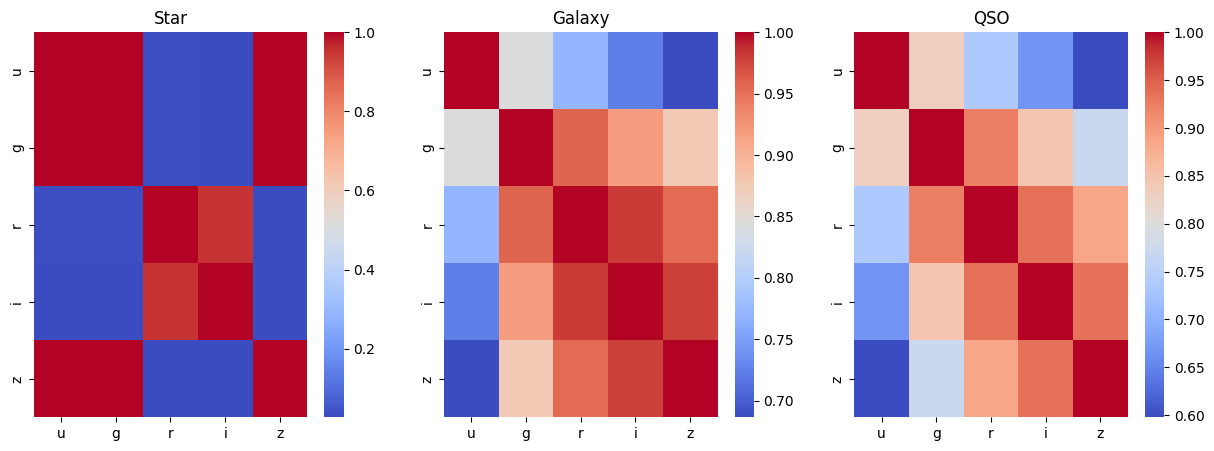

In [19]:
# In astronomy, a photometric system is a set of well-defined passbands (or optical filters), with a known sensitivity to incident radiation. 
# The sensitivity usually depends on the optical system, detectors and filters used.
# Photometric systems are usually characterized according to the widths of their passbands which are used to capture the observations.
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
fig.set_dpi(100)
ax = sns.heatmap(df[df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(df[df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(df[df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

##### We can see  the correlation is almost  the same for galaxy and QSO class...BUT the different with star class. 
##### We can tell that there are high correlations between the different bands. we can think that if one of the bands captures some object, the other bands also capture other object.

### Detect Outliers

In [20]:
for x in ['redshift','u' ,'g','r' ,'i', 'z' ]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    df = df.dropna(axis = 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90635 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       90635 non-null  float64
 1   alpha        90635 non-null  float64
 2   delta        90635 non-null  float64
 3   u            90635 non-null  float64
 4   g            90635 non-null  float64
 5   r            90635 non-null  float64
 6   i            90635 non-null  float64
 7   z            90635 non-null  float64
 8   run_ID       90635 non-null  int64  
 9   rerun_ID     90635 non-null  int64  
 10  cam_col      90635 non-null  int64  
 11  field_ID     90635 non-null  int64  
 12  spec_obj_ID  90635 non-null  float64
 13  class        90635 non-null  object 
 14  redshift     90635 non-null  float64
 15  plate        90635 non-null  int64  
 16  MJD          90635 non-null  int64  
 17  fiber_ID     90635 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

#### We select the SMOTE technique to solve the data imbalanced.

In [22]:
# Encoding the categorical value of class 
df['class'] = df['class'].replace({'GALAXY': 0,
                                   'STAR'  : 1,
                                   'QSO'   : 2})

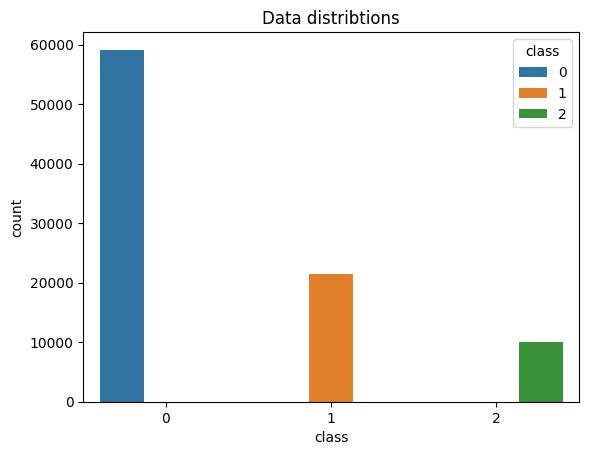

In [23]:
#Data distribtions for each class 
categorical_list = ["class"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title('Data distribtions')

In [24]:
# split the class from other features
y = df["class"]
x = df.drop("class", axis=1)

In [25]:
# Applying SMOTE
smote = SMOTE(random_state=10)
print('Original dataset shape %s' % Counter(y))
x, y = smote.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59150, 1: 21506, 2: 9979})
Resampled dataset shape Counter({0: 59150, 2: 59150, 1: 59150})


In [28]:
# check the class 
y.value_counts()

0    59150
2    59150
1    59150
Name: class, dtype: int64

In [26]:
# concatenate the features
df_1=pd.concat([x,y],axis=1)

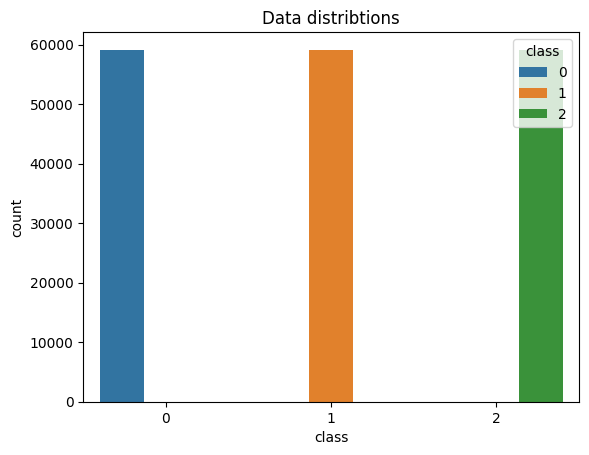

In [27]:
# Data distribtions for each class after balancing the data
categorical_list = ["class"]
df_categoric = df_1.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title('Data distribtions')

In [ ]:
# saving the dataframe
# df.to_csv(r'C:\Users\Mariam\Desktop\Balanced_star_classification.csv')

### Splitting the dataset

In [29]:
x = df_1.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID'],axis=1,inplace=True)
#View the data
df_1.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,56354,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,55592,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,58039,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,56187,0


In [ ]:
x = df_1.drop(['class'], axis=1)
y = df_1['class']
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

### Normalizing approach

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)